In [38]:
import os
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# PART 1

In [101]:
# Load data
df = pd.read_csv('data.csv')
df.columns = ['date', 'y']
df['dy'] = df['y'].pct_change()
df.dropna(inplace=True)
df.head()

,date,y,dy
1,1949-01-01,95610.0,-0.035402
2,1950-01-01,100064.0,0.046585
3,1951-01-01,108525.0,0.084556
4,1952-01-01,110757.0,0.020567
5,1953-01-01,112184.0,0.012884


In [102]:
lags = 2 #Taking the lags from ARIMA model

# Create lagged dataset
data = pd.DataFrame(df['dy'].values, columns=['dy'])
for i in range(1, lags + 1):
    data[f'lag_{i}'] = data['dy'].shift(i)

    # Drop rows with NaN values
data.dropna(inplace=True)

In [63]:
# Split the data into features (X) and target variable (y)
X = data.drop('dy', axis=1)
y = data['dy']

#Perform an 80-20 random train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y.values, test_size=0.2, random_state=42
)

# Define the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(lags,)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
num_epochs = 1000
history = model.fit(X_train, y_train, epochs=num_epochs, verbose=2)
test_predictions = model.predict(X_test)

Epoch 1/1000
2/2 - 0s - loss: 9.4892e-04 - 393ms/epoch - 196ms/step
Epoch 2/1000
2/2 - 0s - loss: 7.8768e-04 - 6ms/epoch - 3ms/step
Epoch 3/1000
2/2 - 0s - loss: 6.7665e-04 - 6ms/epoch - 3ms/step
Epoch 4/1000
2/2 - 0s - loss: 5.9447e-04 - 7ms/epoch - 3ms/step
Epoch 5/1000
2/2 - 0s - loss: 5.5715e-04 - 10ms/epoch - 5ms/step
Epoch 6/1000
2/2 - 0s - loss: 5.4273e-04 - 5ms/epoch - 3ms/step
Epoch 7/1000
2/2 - 0s - loss: 5.2926e-04 - 8ms/epoch - 4ms/step
Epoch 8/1000
2/2 - 0s - loss: 5.3395e-04 - 7ms/epoch - 4ms/step
Epoch 9/1000
2/2 - 0s - loss: 5.3762e-04 - 10ms/epoch - 5ms/step
Epoch 10/1000
2/2 - 0s - loss: 5.3791e-04 - 8ms/epoch - 4ms/step
Epoch 11/1000
2/2 - 0s - loss: 5.3399e-04 - 8ms/epoch - 4ms/step
Epoch 12/1000
2/2 - 0s - loss: 5.2843e-04 - 7ms/epoch - 3ms/step
Epoch 13/1000
2/2 - 0s - loss: 5.1973e-04 - 12ms/epoch - 6ms/step
Epoch 14/1000
2/2 - 0s - loss: 5.1515e-04 - 7ms/epoch - 4ms/step
Epoch 15/1000
2/2 - 0s - loss: 5.0997e-04 - 7ms/epoch - 3ms/step
Epoch 16/1000
2/2 - 0s - lo

Epoch 127/1000
2/2 - 0s - loss: 4.4699e-04 - 6ms/epoch - 3ms/step
Epoch 128/1000
2/2 - 0s - loss: 4.4702e-04 - 5ms/epoch - 3ms/step
Epoch 129/1000
2/2 - 0s - loss: 4.4716e-04 - 6ms/epoch - 3ms/step
Epoch 130/1000
2/2 - 0s - loss: 4.4660e-04 - 7ms/epoch - 4ms/step
Epoch 131/1000
2/2 - 0s - loss: 4.4728e-04 - 6ms/epoch - 3ms/step
Epoch 132/1000
2/2 - 0s - loss: 4.4731e-04 - 5ms/epoch - 3ms/step
Epoch 133/1000
2/2 - 0s - loss: 4.4713e-04 - 6ms/epoch - 3ms/step
Epoch 134/1000
2/2 - 0s - loss: 4.4641e-04 - 5ms/epoch - 2ms/step
Epoch 135/1000
2/2 - 0s - loss: 4.4645e-04 - 6ms/epoch - 3ms/step
Epoch 136/1000
2/2 - 0s - loss: 4.4661e-04 - 6ms/epoch - 3ms/step
Epoch 137/1000
2/2 - 0s - loss: 4.4663e-04 - 6ms/epoch - 3ms/step
Epoch 138/1000
2/2 - 0s - loss: 4.4743e-04 - 6ms/epoch - 3ms/step
Epoch 139/1000
2/2 - 0s - loss: 4.4651e-04 - 6ms/epoch - 3ms/step
Epoch 140/1000
2/2 - 0s - loss: 4.4656e-04 - 6ms/epoch - 3ms/step
Epoch 141/1000
2/2 - 0s - loss: 4.4633e-04 - 5ms/epoch - 3ms/step
Epoch 142/

2/2 - 0s - loss: 4.4050e-04 - 6ms/epoch - 3ms/step
Epoch 252/1000
2/2 - 0s - loss: 4.4000e-04 - 6ms/epoch - 3ms/step
Epoch 253/1000
2/2 - 0s - loss: 4.3991e-04 - 5ms/epoch - 2ms/step
Epoch 254/1000
2/2 - 0s - loss: 4.3962e-04 - 5ms/epoch - 2ms/step
Epoch 255/1000
2/2 - 0s - loss: 4.3955e-04 - 7ms/epoch - 4ms/step
Epoch 256/1000
2/2 - 0s - loss: 4.4034e-04 - 4ms/epoch - 2ms/step
Epoch 257/1000
2/2 - 0s - loss: 4.3959e-04 - 5ms/epoch - 3ms/step
Epoch 258/1000
2/2 - 0s - loss: 4.4035e-04 - 5ms/epoch - 2ms/step
Epoch 259/1000
2/2 - 0s - loss: 4.3967e-04 - 6ms/epoch - 3ms/step
Epoch 260/1000
2/2 - 0s - loss: 4.3946e-04 - 6ms/epoch - 3ms/step
Epoch 261/1000
2/2 - 0s - loss: 4.4009e-04 - 5ms/epoch - 2ms/step
Epoch 262/1000
2/2 - 0s - loss: 4.3899e-04 - 5ms/epoch - 3ms/step
Epoch 263/1000
2/2 - 0s - loss: 4.3991e-04 - 5ms/epoch - 2ms/step
Epoch 264/1000
2/2 - 0s - loss: 4.4093e-04 - 7ms/epoch - 4ms/step
Epoch 265/1000
2/2 - 0s - loss: 4.3879e-04 - 6ms/epoch - 3ms/step
Epoch 266/1000
2/2 - 0s -

Epoch 376/1000
2/2 - 0s - loss: 4.2940e-04 - 5ms/epoch - 3ms/step
Epoch 377/1000
2/2 - 0s - loss: 4.2946e-04 - 5ms/epoch - 2ms/step
Epoch 378/1000
2/2 - 0s - loss: 4.2916e-04 - 5ms/epoch - 3ms/step
Epoch 379/1000
2/2 - 0s - loss: 4.2994e-04 - 6ms/epoch - 3ms/step
Epoch 380/1000
2/2 - 0s - loss: 4.2931e-04 - 5ms/epoch - 2ms/step
Epoch 381/1000
2/2 - 0s - loss: 4.2946e-04 - 6ms/epoch - 3ms/step
Epoch 382/1000
2/2 - 0s - loss: 4.2851e-04 - 7ms/epoch - 3ms/step
Epoch 383/1000
2/2 - 0s - loss: 4.2904e-04 - 6ms/epoch - 3ms/step
Epoch 384/1000
2/2 - 0s - loss: 4.2986e-04 - 6ms/epoch - 3ms/step
Epoch 385/1000
2/2 - 0s - loss: 4.2887e-04 - 5ms/epoch - 3ms/step
Epoch 386/1000
2/2 - 0s - loss: 4.2844e-04 - 6ms/epoch - 3ms/step
Epoch 387/1000
2/2 - 0s - loss: 4.2795e-04 - 5ms/epoch - 3ms/step
Epoch 388/1000
2/2 - 0s - loss: 4.2833e-04 - 6ms/epoch - 3ms/step
Epoch 389/1000
2/2 - 0s - loss: 4.2819e-04 - 5ms/epoch - 3ms/step
Epoch 390/1000
2/2 - 0s - loss: 4.3036e-04 - 7ms/epoch - 3ms/step
Epoch 391/

2/2 - 0s - loss: 4.1811e-04 - 5ms/epoch - 3ms/step
Epoch 501/1000
2/2 - 0s - loss: 4.1739e-04 - 5ms/epoch - 3ms/step
Epoch 502/1000
2/2 - 0s - loss: 4.1747e-04 - 5ms/epoch - 3ms/step
Epoch 503/1000
2/2 - 0s - loss: 4.1754e-04 - 7ms/epoch - 4ms/step
Epoch 504/1000
2/2 - 0s - loss: 4.1722e-04 - 5ms/epoch - 3ms/step
Epoch 505/1000
2/2 - 0s - loss: 4.1699e-04 - 6ms/epoch - 3ms/step
Epoch 506/1000
2/2 - 0s - loss: 4.1860e-04 - 5ms/epoch - 3ms/step
Epoch 507/1000
2/2 - 0s - loss: 4.1792e-04 - 7ms/epoch - 3ms/step
Epoch 508/1000
2/2 - 0s - loss: 4.1670e-04 - 6ms/epoch - 3ms/step
Epoch 509/1000
2/2 - 0s - loss: 4.1664e-04 - 8ms/epoch - 4ms/step
Epoch 510/1000
2/2 - 0s - loss: 4.1649e-04 - 6ms/epoch - 3ms/step
Epoch 511/1000
2/2 - 0s - loss: 4.1828e-04 - 7ms/epoch - 4ms/step
Epoch 512/1000
2/2 - 0s - loss: 4.1678e-04 - 7ms/epoch - 4ms/step
Epoch 513/1000
2/2 - 0s - loss: 4.1580e-04 - 7ms/epoch - 3ms/step
Epoch 514/1000
2/2 - 0s - loss: 4.1795e-04 - 7ms/epoch - 4ms/step
Epoch 515/1000
2/2 - 0s -

Epoch 625/1000
2/2 - 0s - loss: 4.0589e-04 - 8ms/epoch - 4ms/step
Epoch 626/1000
2/2 - 0s - loss: 4.0861e-04 - 6ms/epoch - 3ms/step
Epoch 627/1000
2/2 - 0s - loss: 4.0537e-04 - 8ms/epoch - 4ms/step
Epoch 628/1000
2/2 - 0s - loss: 4.0621e-04 - 6ms/epoch - 3ms/step
Epoch 629/1000
2/2 - 0s - loss: 4.0548e-04 - 6ms/epoch - 3ms/step
Epoch 630/1000
2/2 - 0s - loss: 4.0529e-04 - 7ms/epoch - 4ms/step
Epoch 631/1000
2/2 - 0s - loss: 4.0532e-04 - 7ms/epoch - 4ms/step
Epoch 632/1000
2/2 - 0s - loss: 4.0595e-04 - 7ms/epoch - 3ms/step
Epoch 633/1000
2/2 - 0s - loss: 4.0456e-04 - 7ms/epoch - 4ms/step
Epoch 634/1000
2/2 - 0s - loss: 4.0434e-04 - 8ms/epoch - 4ms/step
Epoch 635/1000
2/2 - 0s - loss: 4.0608e-04 - 5ms/epoch - 2ms/step
Epoch 636/1000
2/2 - 0s - loss: 4.0406e-04 - 6ms/epoch - 3ms/step
Epoch 637/1000
2/2 - 0s - loss: 4.0449e-04 - 6ms/epoch - 3ms/step
Epoch 638/1000
2/2 - 0s - loss: 4.0626e-04 - 5ms/epoch - 3ms/step
Epoch 639/1000
2/2 - 0s - loss: 4.0472e-04 - 7ms/epoch - 3ms/step
Epoch 640/

2/2 - 0s - loss: 3.9467e-04 - 5ms/epoch - 2ms/step
Epoch 750/1000
2/2 - 0s - loss: 3.9440e-04 - 5ms/epoch - 2ms/step
Epoch 751/1000
2/2 - 0s - loss: 3.9356e-04 - 5ms/epoch - 2ms/step
Epoch 752/1000
2/2 - 0s - loss: 3.9350e-04 - 6ms/epoch - 3ms/step
Epoch 753/1000
2/2 - 0s - loss: 3.9373e-04 - 6ms/epoch - 3ms/step
Epoch 754/1000
2/2 - 0s - loss: 3.9380e-04 - 5ms/epoch - 2ms/step
Epoch 755/1000
2/2 - 0s - loss: 3.9410e-04 - 6ms/epoch - 3ms/step
Epoch 756/1000
2/2 - 0s - loss: 3.9353e-04 - 6ms/epoch - 3ms/step
Epoch 757/1000
2/2 - 0s - loss: 3.9342e-04 - 6ms/epoch - 3ms/step
Epoch 758/1000
2/2 - 0s - loss: 3.9326e-04 - 6ms/epoch - 3ms/step
Epoch 759/1000
2/2 - 0s - loss: 3.9342e-04 - 5ms/epoch - 2ms/step
Epoch 760/1000
2/2 - 0s - loss: 3.9288e-04 - 7ms/epoch - 3ms/step
Epoch 761/1000
2/2 - 0s - loss: 3.9350e-04 - 5ms/epoch - 2ms/step
Epoch 762/1000
2/2 - 0s - loss: 3.9409e-04 - 6ms/epoch - 3ms/step
Epoch 763/1000
2/2 - 0s - loss: 3.9334e-04 - 5ms/epoch - 3ms/step
Epoch 764/1000
2/2 - 0s -

Epoch 874/1000
2/2 - 0s - loss: 3.8923e-04 - 6ms/epoch - 3ms/step
Epoch 875/1000
2/2 - 0s - loss: 3.8591e-04 - 6ms/epoch - 3ms/step
Epoch 876/1000
2/2 - 0s - loss: 3.8566e-04 - 7ms/epoch - 3ms/step
Epoch 877/1000
2/2 - 0s - loss: 3.8677e-04 - 5ms/epoch - 2ms/step
Epoch 878/1000
2/2 - 0s - loss: 3.8725e-04 - 6ms/epoch - 3ms/step
Epoch 879/1000
2/2 - 0s - loss: 3.8676e-04 - 5ms/epoch - 2ms/step
Epoch 880/1000
2/2 - 0s - loss: 3.8656e-04 - 6ms/epoch - 3ms/step
Epoch 881/1000
2/2 - 0s - loss: 3.8587e-04 - 7ms/epoch - 4ms/step
Epoch 882/1000
2/2 - 0s - loss: 3.8546e-04 - 6ms/epoch - 3ms/step
Epoch 883/1000
2/2 - 0s - loss: 3.8588e-04 - 6ms/epoch - 3ms/step
Epoch 884/1000
2/2 - 0s - loss: 3.8562e-04 - 8ms/epoch - 4ms/step
Epoch 885/1000
2/2 - 0s - loss: 3.8814e-04 - 7ms/epoch - 3ms/step
Epoch 886/1000
2/2 - 0s - loss: 3.8895e-04 - 6ms/epoch - 3ms/step
Epoch 887/1000
2/2 - 0s - loss: 3.8543e-04 - 5ms/epoch - 2ms/step
Epoch 888/1000
2/2 - 0s - loss: 3.8543e-04 - 7ms/epoch - 3ms/step
Epoch 889/

2/2 - 0s - loss: 3.8067e-04 - 5ms/epoch - 3ms/step
Epoch 999/1000
2/2 - 0s - loss: 3.8067e-04 - 7ms/epoch - 3ms/step
Epoch 1000/1000
2/2 - 0s - loss: 3.8047e-04 - 6ms/epoch - 3ms/step
1/1 - 0s - loss: 5.7344e-04 - 78ms/epoch - 78ms/step
1/1 [==============================] - 0s 44ms/step


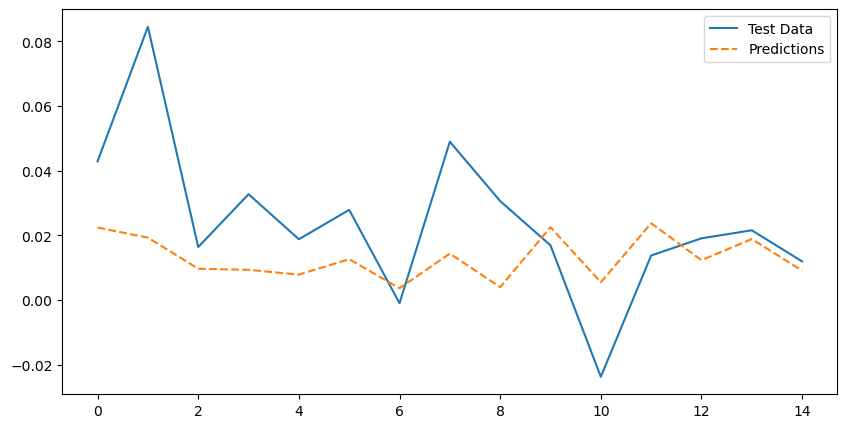

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(X_test)), y_test, label='Test Data')
plt.plot(np.arange(len(X_test)), test_predictions, label='Predictions', linestyle='dashed')
plt.legend()
plt.show()

In [65]:
def calculate_rmsfe(actual, forecast):
    rmsfe = np.sqrt(np.mean((actual - forecast)**2))
    return rmsfe

rmsfe_value = calculate_rmsfe(X_test, test_predictions)
print(f'RMSFE: {rmsfe_value}')

RMSFE: 0.024959299625707455


# PART 2

In [103]:
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:] #First 80% for training and last 20% for testing
print(len(train_data),' ',len(test_data))

56   15


In [104]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu', input_shape=(lags,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
all_predictions = []

# Iterate through the test set with an expanding data window
for i in range(len(test_data)):
    current_data = train_data.append(test_data.iloc[:i + 1])
    X_test = current_data.iloc[-1:, 1:]  # Exclude the dy column, which is the target
    # Training the model with the current data window
    model.fit(current_data.iloc[:, 1:], current_data.iloc[:, 0], epochs=num_epochs, verbose=0)
    prediction = model.predict(X_test)
    
    all_predictions.append(prediction[0, 0])

1/1 [==============================] - 0s 20ms/step


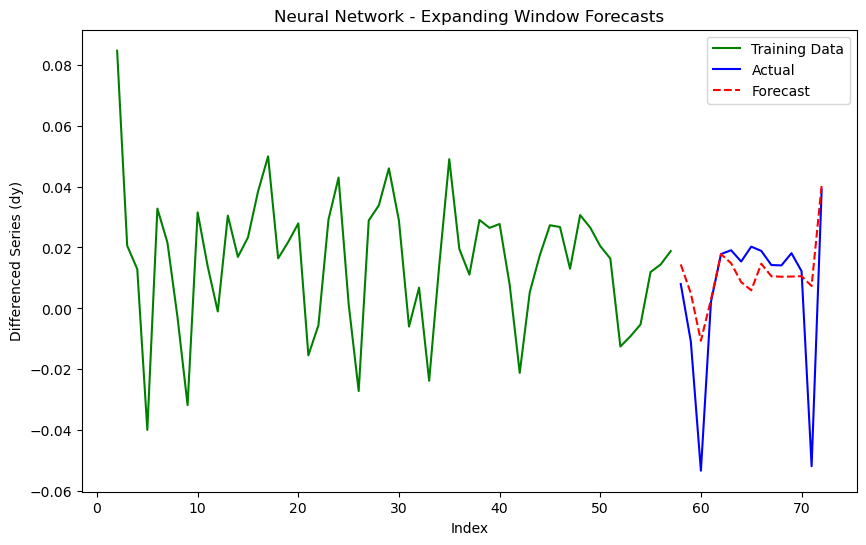

In [105]:
# Plot the actual values and forecasts
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['dy'], label='Training Data', color='green')
plt.plot(test_data.index, test_data['dy'], label='Actual', color='blue')
plt.plot(test_data.index, all_predictions, label='Forecast', color='red', linestyle='dashed')
plt.xlabel('Index')
plt.ylabel('Differenced Series (dy)')
plt.title('Neural Network - Expanding Window Forecasts')
plt.legend()
plt.show()


In [106]:
true_values = test_data['dy'].values
predictions_array = np.array(all_predictions)
rmsfe_value_nn = calculate_rmsfe(true_values, predictions_array) #Using the method defined above 
print(f'RMSFE: {rmsfe_value_nn}')

RMSFE: 0.019973213835948776


## COMPARING ARIMA MODEL :

In [86]:
arima_all_predictions = []

# Iterate through the test set with an expanding data window
for i in range(len(test_data)):
    current_data_arima = train_data.append(test_data.iloc[:i + 1])
    model_arima = ARIMA(current_data_arima["dy"], order=(2, 0, 1))
    model_arima_fit = model_arima.fit()
    
    # Generate one-step-ahead prediction for the current test observation
    prediction = model_arima_fit.forecast(steps=1)
    arima_all_predictions.append(prediction)  # Extract the value from the forecast result

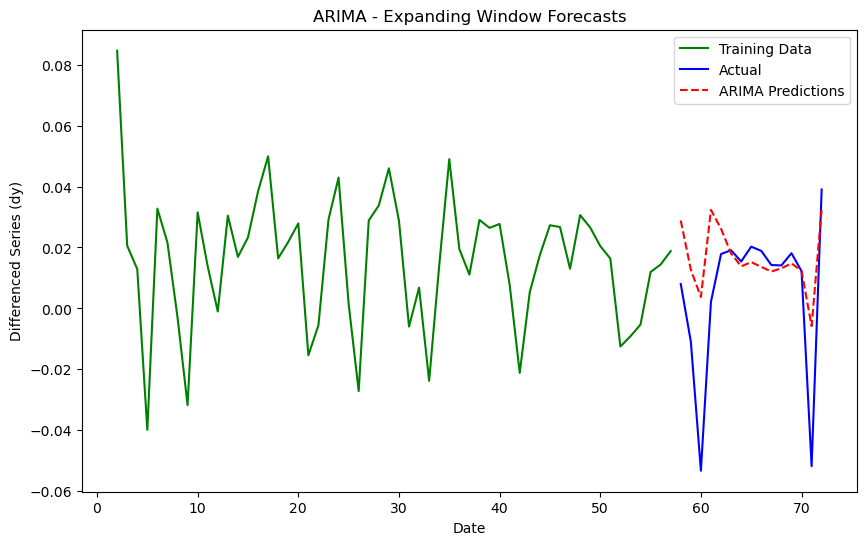

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['dy'], label='Training Data', color='green')
plt.plot(test_data.index, test_data["dy"], label='Actual', color='blue')
plt.plot(test_data.index, arima_all_predictions, label='ARIMA Predictions', color='red',linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Differenced Series (dy)')
plt.title('ARIMA - Expanding Window Forecasts')
plt.legend()
plt.show()

In [88]:
arima_predictions_array = np.array(arima_all_predictions)
rmsfe_value_arima = calculate_rmsfe(true_values, arima_predictions_array) #Using the method defined above 
print(f'RMSFE: {rmsfe_value_arima}')

RMSFE: 0.02891184729256581


## COMPARING VAR MODEL :

In [89]:
from statsmodels.tsa.api import VAR

var_all_predictions = []

# Iterate through the test set with an expanding data window
for i in range(len(test_data)):
    current_data_var = train_data.append(test_data.iloc[:i + 1])

    # Fit VAR model
    model_var = VAR(current_data_var)
    model_var_fit = model_var.fit()

    # Make one-step-ahead prediction for the current test observation
    prediction = model_var_fit.forecast(current_data_var.values[-model_var_fit.k_ar:], steps=1)
    var_all_predictions.append(prediction[0][0])

In [90]:
print(model_var_fit.k_ar)

1


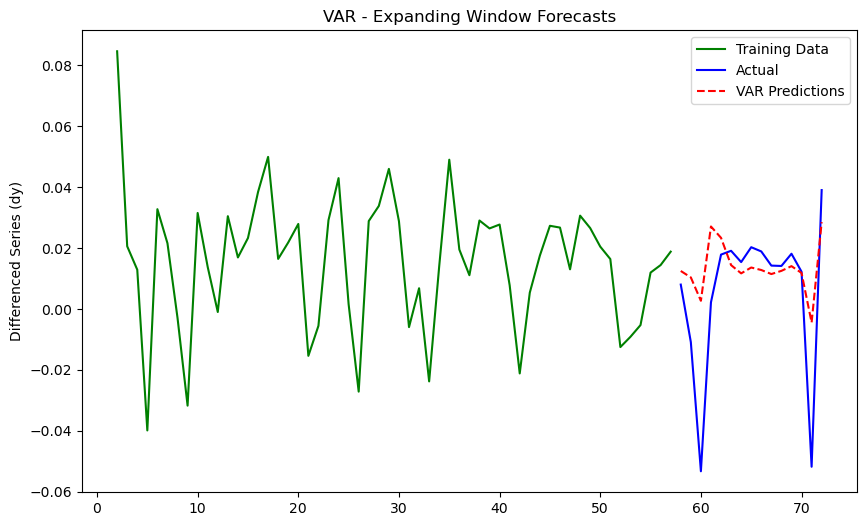

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['dy'], label='Training Data', color='green')
plt.plot(test_data.index, test_data["dy"], label='Actual', color='blue')
plt.plot(test_data.index, var_all_predictions, label='VAR Predictions', color='red',linestyle='dashed')
plt.ylabel('Differenced Series (dy)')
plt.title('VAR - Expanding Window Forecasts')
plt.legend()
plt.show()

In [93]:
var_predictions_array = np.array(var_all_predictions)
rmsfe_value_var = calculate_rmsfe(true_values, var_predictions_array) #Using the method defined above 
print(f'RMSFE: {rmsfe_value_var}')

RMSFE: 0.02120515354860363


In [107]:
RMSFE = {
    'NN': [rmsfe_value_nn],
    'ARIMA': [rmsfe_value_arima],
    'VAR': [rmsfe_value_var]
}
results = pd.DataFrame(RMSFE)
print(results)

         NN     ARIMA       VAR
0  0.019973  0.028912  0.021205


In [110]:
best_model = results.idxmin(axis=1) #Checks for the minimum rmsfe value and returns the corresponding column (model name)
print(best_model)

0    NN
dtype: object


We clearly see that Neural Networks performed best with the data (least RMSFE) and captured the trend pretty well. The chosen architecture with one hidden layer having 5 neurons and a ReLU activation function may be suitable for capturing non-linear patterns in the data. I used epoch hyperparameter which specifically refers to the number of times the entire training dataset is passed forward and backward through the neural network during training. The model maybe, along with the expanding window learnt better and gave good one step ahead predictions.The intricate patterns and dependencies might be challenging for linear models like ARIMA and VAR to capture and hence they did not perform as well as the neural network.